# Decision Tree (의사결정나무)
- TA: 전은지 (Eunji Jeon)  
- Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
- 문의: `jej_0312_@naver.com`

- [의사결정 나무](https://heytech.tistory.com/145)
  - 불순도 (impurity)가 작은 방향, information gain이 큰 방향으로 분기 (e.g., entropy, gini index, ...)
  - [ID3](https://tyami.github.io/machine%20learning/decision-tree-2-ID3/), [C4.5](https://tyami.github.io/machine%20learning/decision-tree-3-c4_5/), CART 등
- 장점
  - 간단하고 효과적
  - interpretable/직관적 rule
  - 통계적 가정 불필요
- 단점
  - 비연속성: 분리의 경계점 근방에서는 예측 오류가 클 가능성이 있음
  - 선형성 결여: 전체적인 선형 관계 파악이 어려움
  - 비안정성: 데이터 수가 적을 경우 불안정; 과적합에 취약하므로 가지치기 필요

- based on [CART](https://tyami.github.io/machine%20learning/decision-tree-4-CART/)
  - gini index를 기준으로 불순도 평가
  - binary tree 사용
  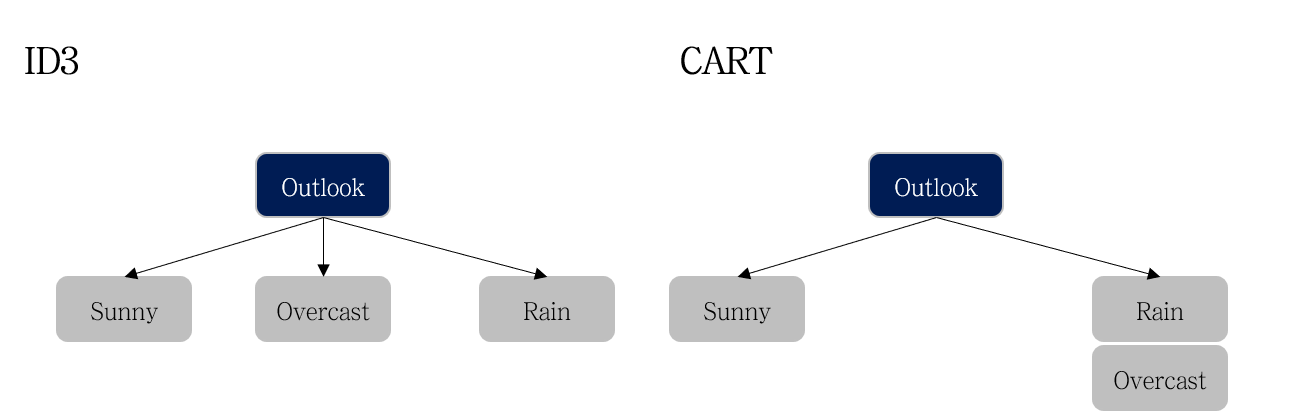

# Y: Categorical

## Step 1. Preprocessing

In [1]:
# csv파일 불러오기
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/shubham13p/Ad-Click-Prediction/master/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [2]:
data # 0: not Click, 1: click

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [ ]:
data.info()
# tennis_data.isnull().sum() 결측치확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [3]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Daily Time Spent on Site       68.215
Age                            35.000
Area Income                 57012.300
Daily Internet Usage          183.130
Male                            0.000
Clicked on Ad                   0.500
dtype: float64

In [4]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
import pandas as pd
data['Clicked on Ad'].value_counts() # Y열의 데이터 개수 확인

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [6]:
data=data.drop(columns=['Ad Topic Line','City','Country','Timestamp']) 
# data.loc[(data['Age'] >= 0) & (data['Age'] < 30), 'Age'] = 2 # 19~29세
# data.loc[(data['Age'] >= 30) & (data['Age'] < 40), 'Age'] = 3 # 30대
# data.loc[(data['Age'] >= 40) & (data['Age'] < 50), 'Age'] = 4 # 40대
# data.loc[(data['Age'] >= 50), 'Age'] = 5 # 50대 이상
# data['Age'] = data['Age'].apply(int)

In [7]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [8]:
# Features와 target 나누기
t_features = data[data.columns[:-1]]
t_target = data[data.columns[-1]]

In [9]:
t_features

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [10]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    t_features, t_target, test_size = 0.2, random_state = 2021, stratify=t_target)

In [11]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

800
800
200
200


In [12]:
import pandas as pd
pd.DataFrame(train_target)['Clicked on Ad'].value_counts() # Y열의 데이터 개수 확인

0    400
1    400
Name: Clicked on Ad, dtype: int64

- class 불균형이 심한 경우 샘플링 진행

In [13]:
# Under Sampling: Y값을 각각 {0, 1} 239명씩
## sampling하기 전에 shuffling을 해주기(행 순서 섞기)
import sklearn
x_shuffled = sklearn.utils.shuffle(train_features, random_state=312)
y_shuffled = sklearn.utils.shuffle(train_target, random_state=312)



import imblearn
from imblearn.under_sampling import RandomUnderSampler
train_features_us, train_target_us = RandomUnderSampler(random_state=312).fit_resample(x_shuffled, y_shuffled)

In [14]:
import pandas as pd
pd.DataFrame(train_target_us)['Clicked on Ad'].value_counts() # Y열의 데이터 개수 확인: total 546명

0    400
1    400
Name: Clicked on Ad, dtype: int64

## Step 2. Decision Tree Modeling
- entropy (uncertainty)
  - $E=-\sum^k_{i=1}p_ilog_2(p_i)$

- gini index: 엔트로피와 같은 불순도 (Impurity) 지표
  - 경제적 불평등을 계수화
  - 분류가 잘 될 때 낮은 값
  - CART 알고리즘에서는 모든 조합에 대해 Gini index를 계산한 후, Gini index가 가장 낮은 지표를 찾아 분기
  - $Gini(t,D)=1-\sum_{l \in levels(t)}P(t=l)^2$

- Information gain
  - impurity의 개선 정도
    - decision tree에 의해 나누기 전의 impurity - 나누어진 subset들의 impurity
- pruning

In [15]:
from sklearn.tree import DecisionTreeClassifier
'''
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
'''
tree = DecisionTreeClassifier(random_state = 312)   # criterion = 'gini'
# criterion = 'gini' 또는 'entropy' (default='gini')
# max_depth = None (default)
# min_samples_leaf = 1 (default)
# min_samples_split = None (default)
tree_fit = tree.fit(train_features_us, train_target_us)

In [16]:
dtree = DecisionTreeClassifier(criterion='entropy',random_state=312)
dtree_fit = dtree.fit(train_features_us, train_target_us)



In [17]:
tree_fit

DecisionTreeClassifier(random_state=312)

In [18]:
dtree_fit

DecisionTreeClassifier(criterion='entropy', random_state=312)

In [19]:
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import os

In [20]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['not Clicked on Ad', 'clicked on Ad'])

In [21]:
dot_data = export_graphviz(tree,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png') #Tree 이미지를 저장

True

In [22]:
dot_data2 = export_graphviz(dtree,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph = graph_from_dot_data(dot_data2)
graph.write_png('dtree.png') #Tree 이미지를 저장

True

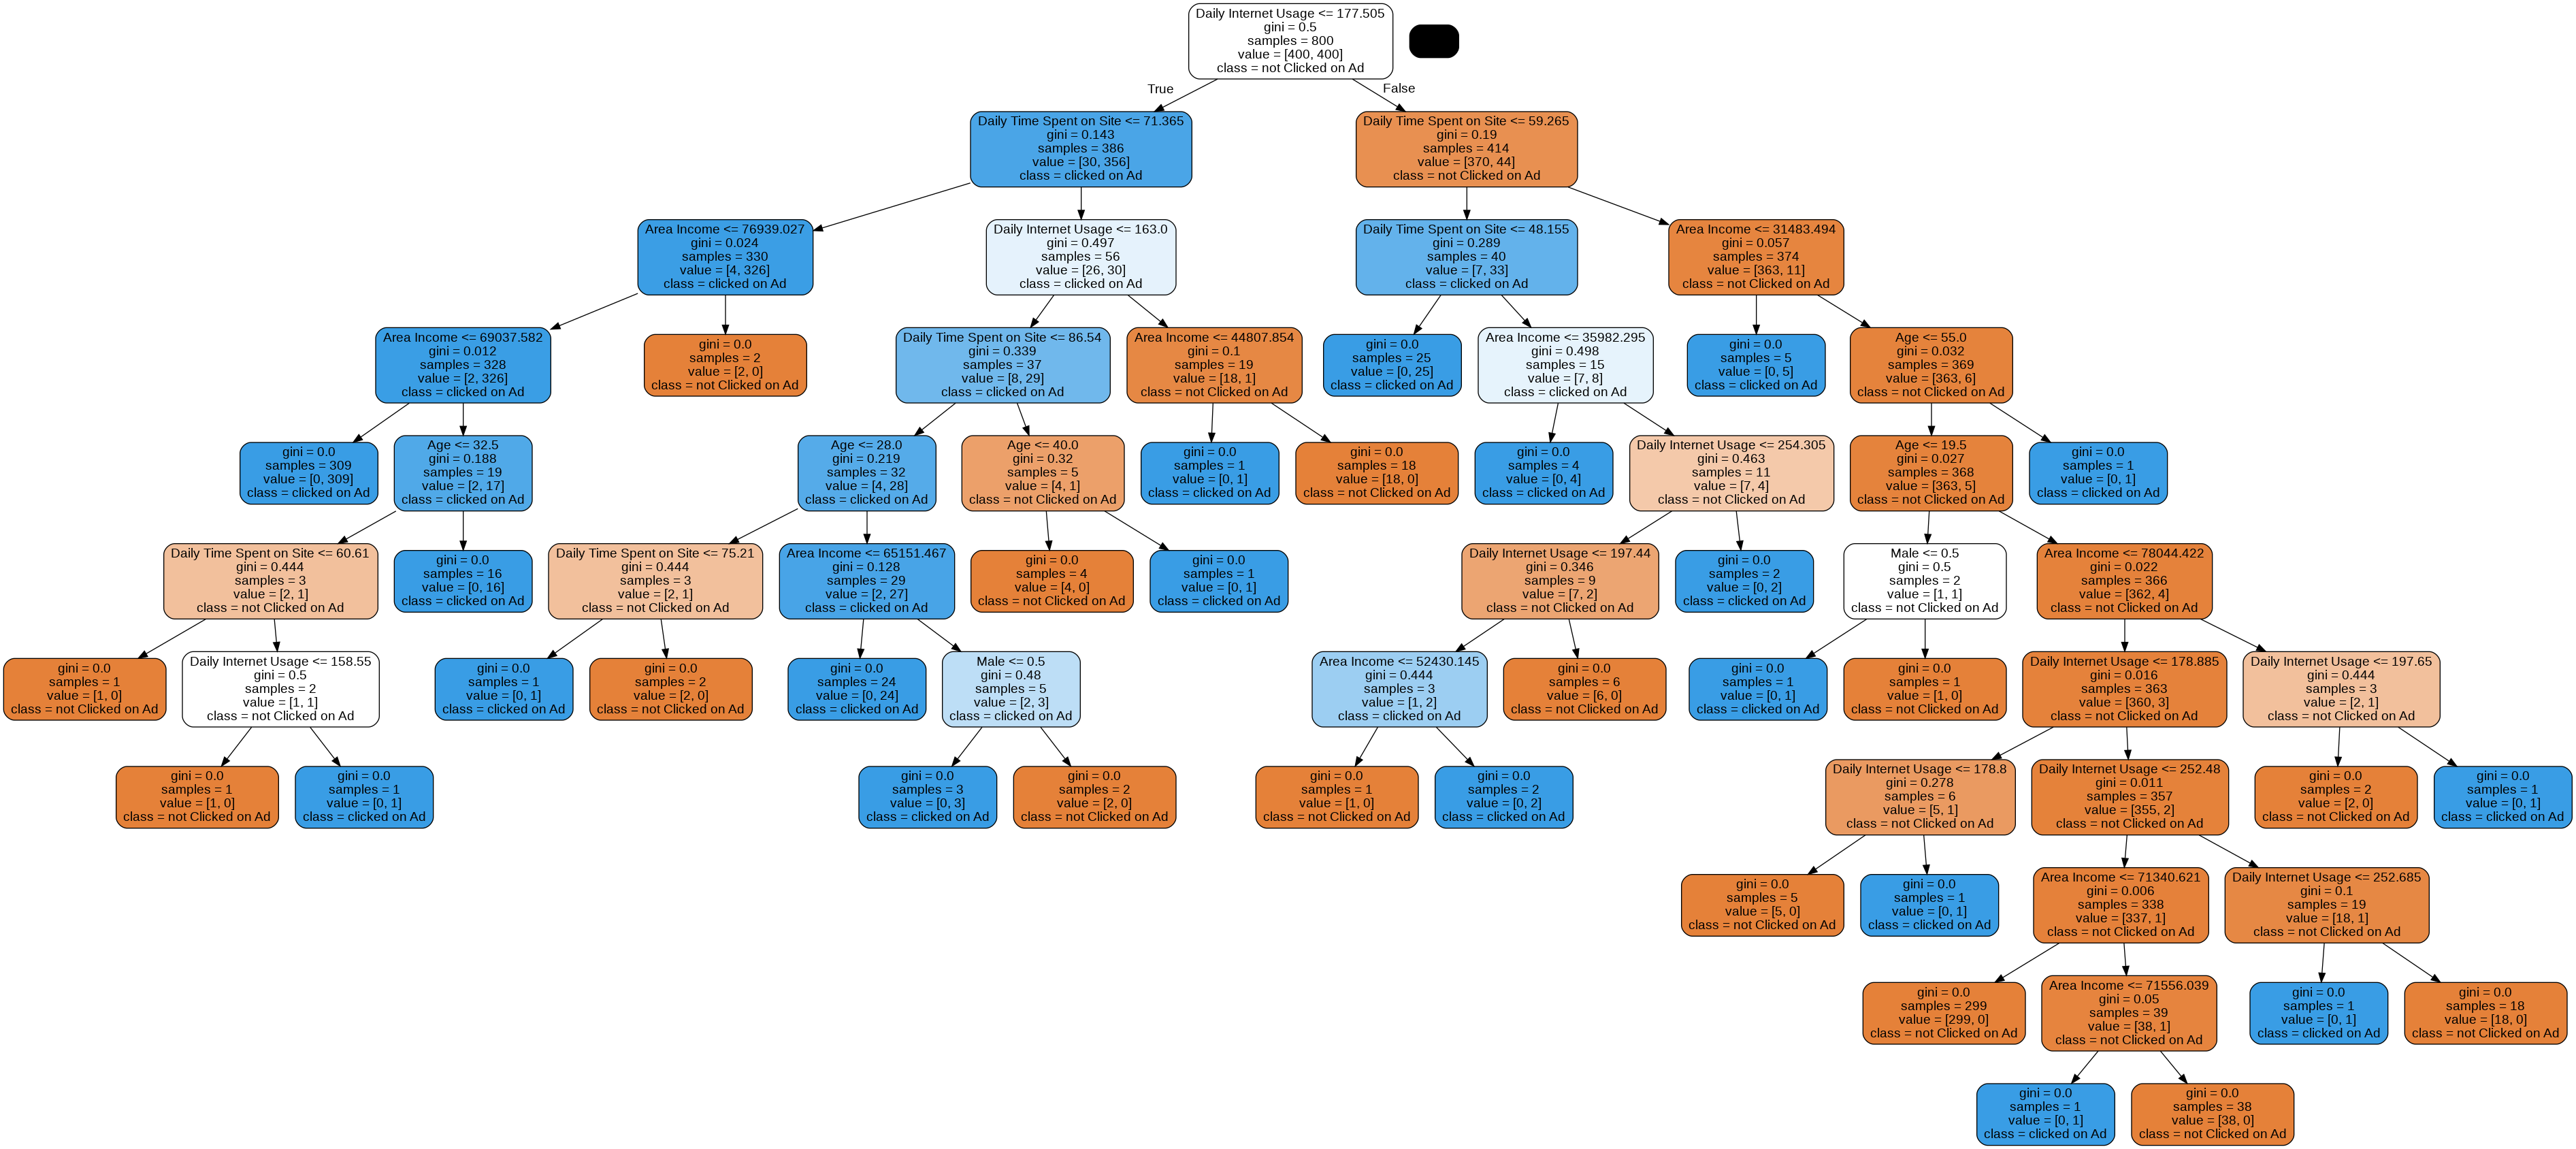

In [23]:
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())

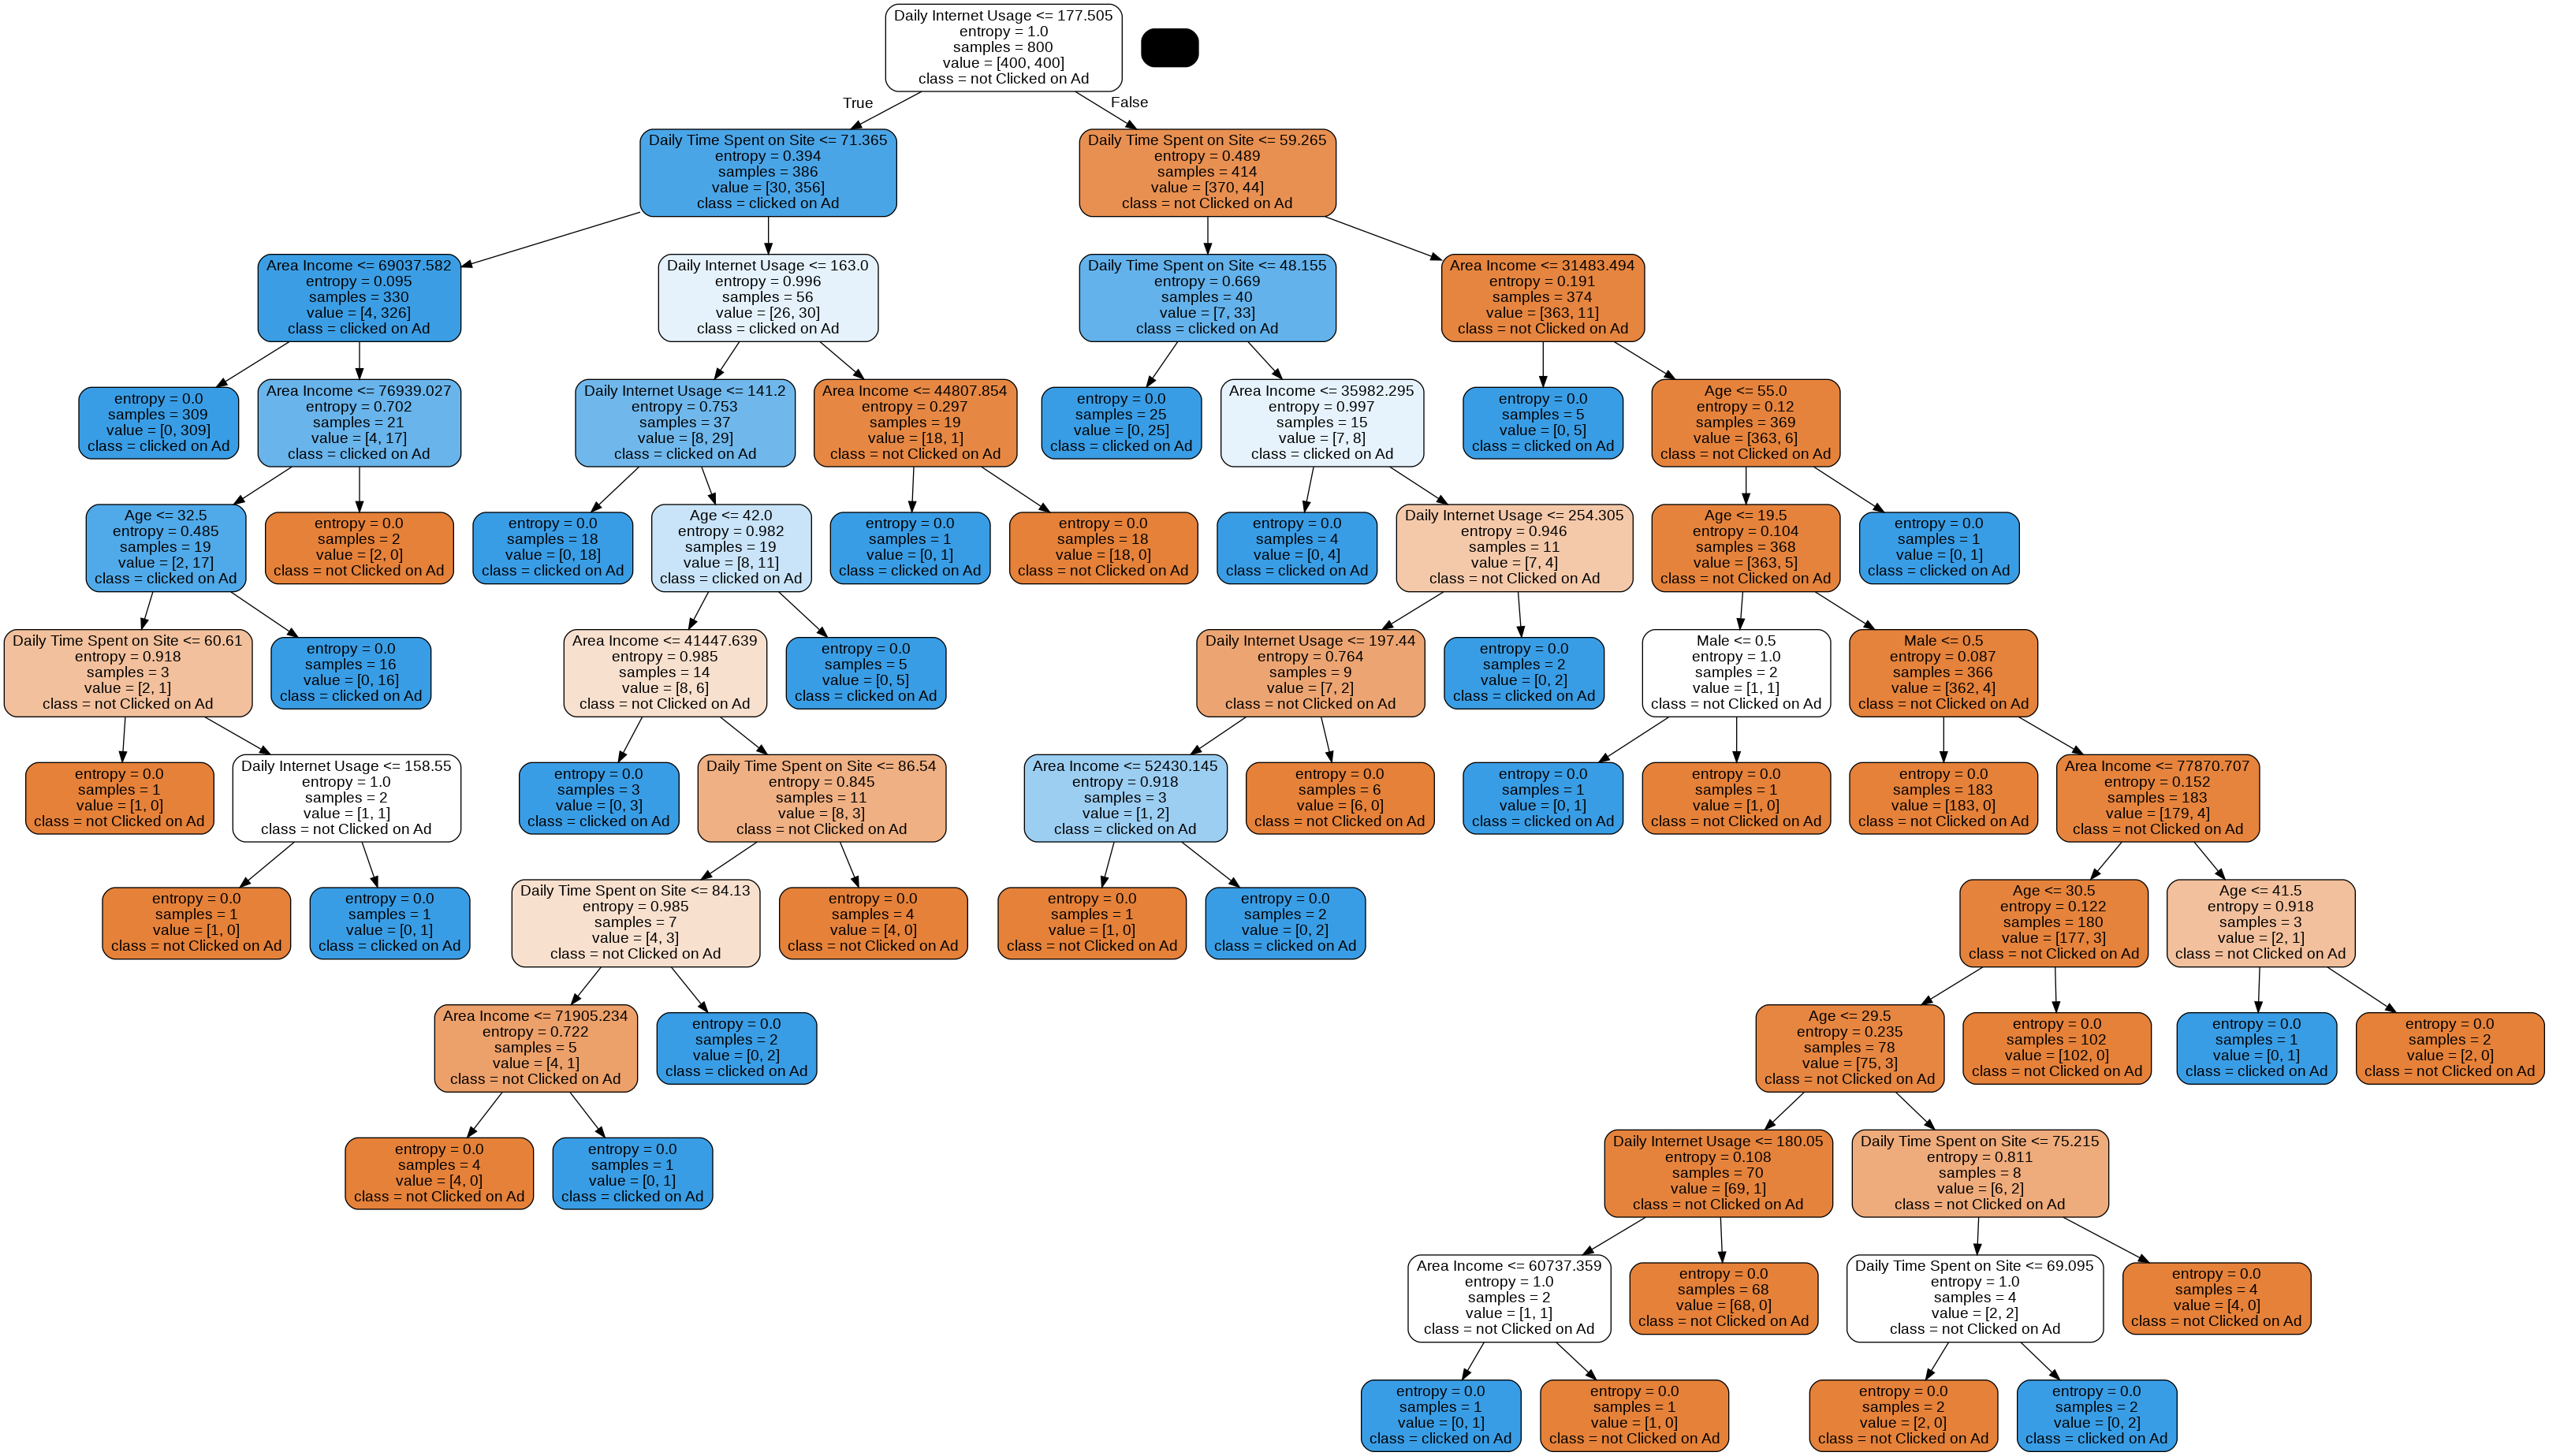

In [24]:
dt_graph2 = pydotplus.graph_from_dot_data(dot_data2)
Image(dt_graph2.create_png())

In [25]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = tree,
                       X=train_features_us,
                       y=train_target_us,
                       scoring = ['accuracy'],
                       cv=10,
                       n_jobs= -1,
                       return_train_score=False)

print('CV accuracy: %s' % scores['test_accuracy'])
print('CV aacuracy(Mean): %.3f (std: %.3f)' % (np.mean(scores['test_accuracy']),
                                     np.std(scores['test_accuracy'])))

CV accuracy: [0.95   0.9625 0.9125 0.975  0.9625 0.975  0.9375 0.95   0.975  0.95  ]
CV aacuracy(Mean): 0.955 (std: 0.019)


In [26]:
from sklearn.model_selection import cross_validate

scores2 = cross_validate(estimator = dtree,
                       X=train_features_us,
                       y=train_target_us,
                       scoring = ['accuracy'],
                       cv=10,
                       n_jobs= -1,
                       return_train_score=False)

print('CV accuracy: %s' % scores2['test_accuracy'])
print('CV aacuracy(Mean): %.3f (std: %.3f)' % (np.mean(scores2['test_accuracy']),
                                     np.std(scores2['test_accuracy'])))

CV accuracy: [0.9625 0.9375 0.925  0.975  0.95   0.9625 0.95   0.95   0.9625 0.95  ]
CV aacuracy(Mean): 0.952 (std: 0.013)


In [27]:
y_pred = tree.predict(test_features)

In [28]:
y_pred2 = dtree.predict(test_features)

In [29]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])

confmat

,Predict[0],Predict[1]
True[0],98,2
True[1],12,88


In [ ]:
from sklearn.metrics import confusion_matrix

confmat2 = pd.DataFrame(confusion_matrix(test_target, y_pred2),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])

confmat2

,Predict[0],Predict[1]
True[0],98,2
True[1],11,89


In [30]:
from sklearn.metrics import classification_report

print('Classification Report about CART')
print(classification_report(test_target, y_pred))

Classification Report about CART
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       100
           1       0.98      0.88      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [31]:
from sklearn.metrics import classification_report

print('Classification Report about ID3')
print(classification_report(test_target, y_pred2))

Classification Report about ID3
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       100
           1       0.98      0.89      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Gini 계수에 관한 정보입니다.')
print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

Gini 계수에 관한 정보입니다.
정확도 accuracy: 0.930
정밀도 precision: 0.978
재현율 recall: 0.880
F1-score: 0.926
AUC: 0.930


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('엔트로피에 관한 정보입니다')
print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred2))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred2))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred2))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred2))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred2))

엔트로피에 관한 정보입니다
정확도 accuracy: 0.935
정밀도 precision: 0.978
재현율 recall: 0.890
F1-score: 0.932
AUC: 0.935


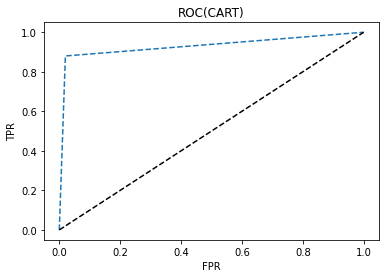

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC(CART)')
plt.show()

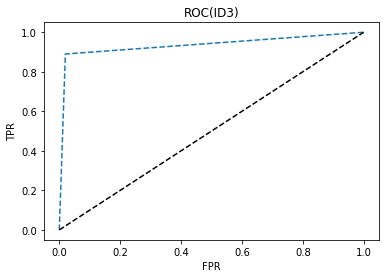

In [ ]:
fpr, tpr, thresholds = roc_curve( test_target, dtree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree about Entropy')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC(ID3)')
plt.show()

## Step 3. Optimization

In [ ]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=312)) # default model로 시작 gini계수 : CART
# pipeline은 hyper-parameter 값을 바꾸면서 여러 모델을 사용 가능.

In [ ]:
from sklearn.pipeline import make_pipeline
pipe_tree2=make_pipeline(DecisionTreeClassifier(criterion='entropy',random_state=312))  # Entropy : ID3
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

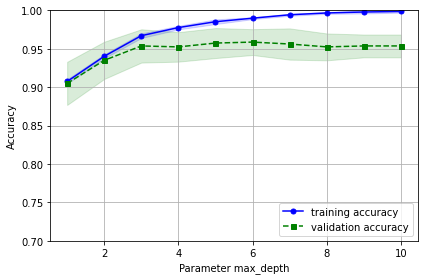

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree2, #기본모형 선택
                                                   X = train_features_us,
                                                   y = train_target_us,
                                                   param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   scoring="accuracy",
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()

# train accuracy와 validation accuracy가 모두 적절한 성능 & 오버피팅이 발생하기 전까지인 max_dept = 4 선택

In [ ]:
# from sklearn.model_selection import validation_curve

# param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
# train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
#                                                    X = train_features_us,
#                                                    y = train_target_us,
#                                                    param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
#                                                    param_range=param_range,
#                                                    scoring="precision",
#                                                    cv=10)

# train_mean = np.mean(train_scores, axis = 1)
# train_std = np.std(train_scores, axis = 1)
# validation_mean = np.mean(validation_scores, axis = 1)
# validation_std = np.std(validation_scores, axis = 1)

# plt.plot(param_range, train_mean,
#         color='blue', marker='o',
#         markersize=5, label='training accuracy')
# plt.fill_between(param_range, 
#                 train_mean + train_std,
#                 train_mean - train_std,
#                 alpha=0.15,
#                 color='blue')
# plt.plot(param_range, validation_mean,
#         color='green', linestyle='--',
#         marker='s', markersize=5,
#         label='validation accuracy')
# plt.fill_between(param_range,
#                 validation_mean + validation_std,
#                 validation_mean - validation_std,
#                 alpha=0.15, color='green')

# plt.grid()
# plt.xlabel('Number of max_depth')
# plt.legend(loc='lower right')
# plt.xlabel('Parameter max_depth')
# plt.ylabel('Precision')
# plt.ylim([0.7, 1.00]) # 보고싶은 구간 설정
# plt.tight_layout()
# plt.show()

In [ ]:
# from sklearn.model_selection import validation_curve

# param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
# train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
#                                                    X = train_features_us,
#                                                    y = train_target_us,
#                                                    param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
#                                                    param_range=param_range,
#                                                    scoring="recall",
#                                                    cv=10)

# train_mean = np.mean(train_scores, axis = 1)
# train_std = np.std(train_scores, axis = 1)
# validation_mean = np.mean(validation_scores, axis = 1)
# validation_std = np.std(validation_scores, axis = 1)

# plt.plot(param_range, train_mean,
#         color='blue', marker='o',
#         markersize=5, label='training accuracy')
# plt.fill_between(param_range, 
#                 train_mean + train_std,
#                 train_mean - train_std,
#                 alpha=0.15,
#                 color='blue')
# plt.plot(param_range, validation_mean,
#         color='green', linestyle='--',
#         marker='s', markersize=5,
#         label='validation accuracy')
# plt.fill_between(param_range,
#                 validation_mean + validation_std,
#                 validation_mean - validation_std,
#                 alpha=0.15, color='green')

# plt.grid()
# plt.xlabel('Number of max_depth')
# plt.legend(loc='lower right')
# plt.xlabel('Parameter max_depth')
# plt.ylabel('Recall')
# plt.ylim([0.7, 1.00]) # 보고싶은 구간 설정
# plt.tight_layout()
# plt.show()

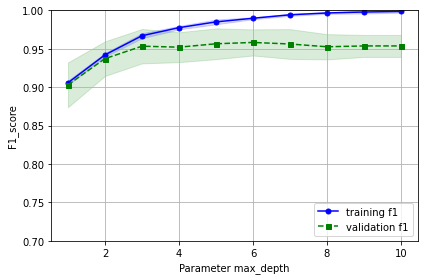

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree2, #기본모형 선택
                                                   X = train_features_us,
                                                   y = train_target_us,
                                                   param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   scoring="f1",
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training f1')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation f1')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('F1_score')
plt.ylim([0.7, 1.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()

## Step 4. Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
#accuracy
param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 15, 20, 25, 30, 35, 40, 45, 50]
param_range3 = ['entropy','gini']

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree2,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', #  Classification일때  'accuracy','f1', Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리; -1은 전부를 의미

gs = gs.fit(train_features_us, train_target_us)


print(gs.best_score_)
print(gs.best_params_)

0.95375
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 15}


In [ ]:
from sklearn.model_selection import GridSearchCV
#f1
param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 15, 20, 25, 30, 35, 40, 45, 50]
param_range3 = ['entropy','gini']

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree2,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'f1', #  Classification일때  'accuracy','f1', Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리; -1은 전부를 의미

gs = gs.fit(train_features_us, train_target_us)


print(gs.best_score_)
print(gs.best_params_)

0.9538948020598736
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 15}


In [ ]:
# from sklearn.model_selection import GridSearchCV

# dparam_range1 = [1,2,3,4,5,6,7,8,9,10]
# dparam_range2 = [10, 15, 20, 25, 30, 35, 40, 45, 50]
# dparam_range3 = ['gini', 'entropy']

# param_grid = [{'decisiontreeclassifier__max_depth': dparam_range1,
#               'decisiontreeclassifier__min_samples_leaf': dparam_range2,
#               'decisiontreeclassifier__criterion': dparam_range3}]

# gs = GridSearchCV(estimator = pipe_tree2,
#                  param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
#                  scoring = 'f1', #  Classification일때  'accuracy','f1', Regression 일때 'neg_mean_squared_error','r2' 등
#                  cv=10,
#                  n_jobs= -1) # 병렬 처리; -1은 전부를 의미

# gs = gs.fit(train_features_us, train_target_us)

# print(gs.best_score_)
# print(gs.best_params_)

In [ ]:
# 최적의 모델 선택
best_tree = gs.best_estimator_
best_tree.fit(train_features_us, train_target_us)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=15,
                                        random_state=312))])

In [ ]:
best_tree_for_graph = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=15, random_state = 312)

In [ ]:
best_tree_for_graph.fit(train_features_us, train_target_us)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=15,
                       random_state=312)

In [ ]:
y_pred = best_tree.predict(test_features)

In [ ]:
confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],97,3
True[1],11,89


In [ ]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       100
           1       0.97      0.89      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

정확도 accuracy: 0.930
정밀도 precision: 0.967
재현율 recall: 0.890
F1-score: 0.927
AUC: 0.930


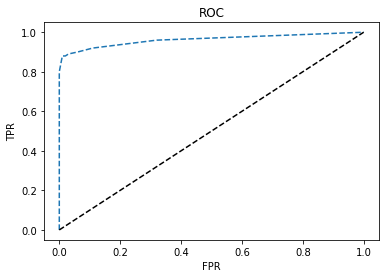

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, best_tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [ ]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['Not cliked on Ad', 'Cliked on Ad'])

In [ ]:
dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph.write_png('tree_best.png') #Tree 이미지를 저장

True

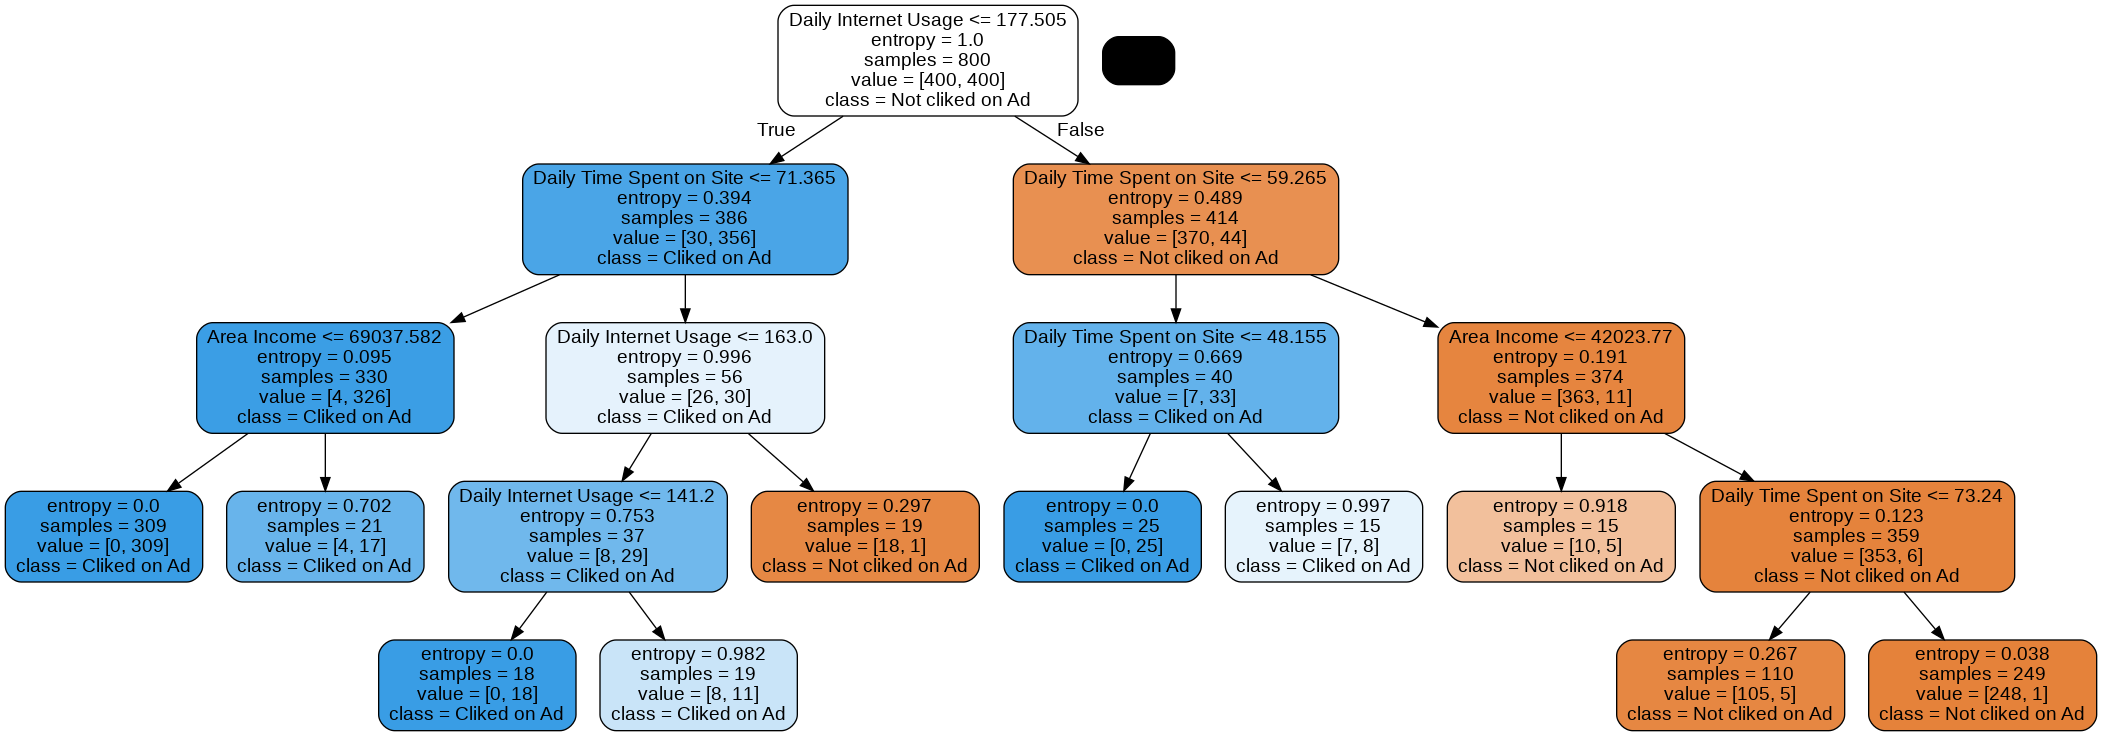

In [ ]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

- [feature_importance](https://soohee410.github.io/iml_tree_importance): 불순도를 가장 크게 감소시키는 변수의 중요도가 가장 큼
  - 연속형 변수 또는 카테고리 개수가 매우 많은 변수들(high cardinality)의 중요도를 더욱 부풀릴 가능성이 높음
  - train 과정에서 얻은 중요도이기 때문에, test 데이터셋에서는 이 변수 중요도가 어떻게 변하는 지 알 수 없음 
  - 어떤 변수가 어떤 방향으로(positive or negative)로 영향일 미치는지 판단을 할 수 없음 -> [shap value](https://todayisbetterthanyesterday.tistory.com/56)

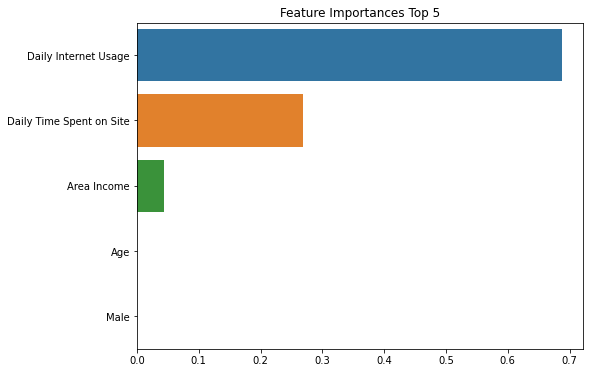

In [ ]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
feature_importances = pd.Series(feature_importance_values, index=train_features_us.columns)
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [ ]:
feature_importances.sort_values(ascending=False)

Daily Internet Usage        0.687971
Daily Time Spent on Site    0.268379
Area Income                 0.043650
Age                         0.000000
Male                        0.000000
dtype: float64

# ID3 -trial but failed...

In [ ]:
# !pip uninstall decision-tree-id3

# !pip install --upgrade scikit-learn==1.0.2
# # from sklearn.externals.six import StringIO  
# # from id3 import Id3Estimator
# # from id3 import export_graphviz

# estimator = Id3Estimator()
# estimator.fit(train_features_us, train_target_us)
# tree = export_graphviz(estimator.tree_, 'tree.dot', feature_names)


# print('The scikit-learn version is {}.'.format(sklearn.__version__))
# print('The imblearn version is {}.'.format(imblearn.__version__))

In [ ]:
import numpy as np

class GadId3Classifier:
  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def entropy(self, attribute_column):
    # find unique values and their frequency counts for the given attribute
    values, counts = np.unique(attribute_column, return_counts=True)

    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      entropy_list.append(-probability*np.log2(probability))

    # calculate sum of individual entropy values
    total_entropy = np.sum(entropy_list)

    return total_entropy

  def information_gain(self, data, feature_attribute_name, target_attribute_name):
    # find total entropy of given subset
    total_entropy = self.entropy(data[target_attribute_name])

    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_entropy_list = []

    for i in range(len(values)):
      subset_probability = counts[i]/np.sum(counts)
      subset_entropy = self.entropy(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_entropy_list.append(subset_probability*subset_entropy)

    total_weighted_entropy = np.sum(weighted_entropy_list)

    # calculate information gain
    information_gain = total_entropy - total_weighted_entropy

    return information_gain

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.information_gain(data, feature, target_attribute_name) for feature in feature_attribute_names]
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return tree

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


test_features = sklearn.utils.shuffle(test_features, random_state=312)
test_target = sklearn.utils.shuffle(test_target, random_state=312)
# initialize and fit model
model = GadId3Classifier()
model.fit(train_features_us, train_target_us)

# return accuracy score
y_pred = model.predict(test_features)
# accuracy_score(test_features,y_pred)
print(y_pred)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]